In [1]:
import seaborn as sns
from pandas import Series
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot
import os
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import numpy as np
from numpy.lib.stride_tricks import as_strided
import scipy.stats as stats

In [2]:
# read data from csv 
def preProcess_ForEach_Participant(fileName):
    df = pd.read_csv(fileName)
    # group data
    groupData = df.groupby(['Label'])
    groupData.first()
    dataFrameArr = []
    for name,group in groupData:
        dataFrameArr.append(group)
    return dataFrameArr

In [65]:
def normalize(df,group,window):
    df_new = df.loc[(df['Label']==group)].head(window)
    s = df_new['Mean_R'].iloc[0]
    l = df_new['Mean_L'].iloc[0]
    df_new['M_R_S'] = df_new['Mean_R']-s
    df_new['M_L_S'] = df_new['Mean_L']-l
    print(l)
    return df_new




0.00044315900000000004
0.0006220605
0.00021543400000000002


<AxesSubplot:ylabel='M_R_S'>

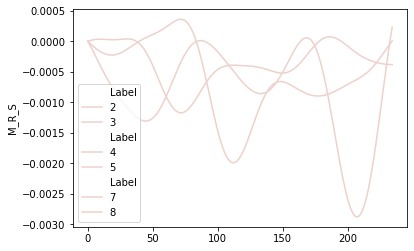

In [68]:
participant = 14
fileName = './csv/p'+str(participant) +'.csv'
df = pd.read_csv(fileName)
df["Mean_R"]=df[['C12','C11','C17']].mean(axis=1) 
df["Mean_L"]=df[['C1','C3','C8']].mean(axis=1) 

x = range(235)
g1 = normalize(df,3,235)

# df_L1 = df.loc[(df['Label']==3)].head(235)
# s = df_L1['Mean_R'].iloc[0]
# l = df_L1['Mean_L'].iloc[0]
# print(l)
# df_L1['M_R_S'] = df_L1['Mean_R']-s
# df_L1['M_L_S'] = df_L1['Mean_L']-l
# sns.lineplot(data=df_L1, x=x, y="M_L_S", hue="Label")
sns.lineplot(data=g1, x=x, y="M_L_S", hue="Label")


g2 = normalize(df,5,235)
sns.lineplot(data=g2, x=x, y="M_L_S", hue="Label")


g3 = normalize(df,8,235)
sns.lineplot(data=df_L3, x=x, y="M_R_S", hue="Label")


In [34]:
l_all= pd.concat([df_L1,df_L2,df_L3])
print(l_all)

time        C1       C10       C11       C12       C13       C14  \
1390  1390  0.000607  0.000234  0.000139  0.000565  0.000388  0.000558   
1391  1391  0.000606  0.000231  0.000143  0.000576  0.000386  0.000559   
1392  1392  0.000603  0.000225  0.000145  0.000583  0.000382  0.000557   
1393  1393  0.000599  0.000218  0.000146  0.000588  0.000376  0.000553   
1394  1394  0.000593  0.000208  0.000146  0.000589  0.000368  0.000547   
...    ...       ...       ...       ...       ...       ...       ...   
8285  8285  0.000130  0.000316  0.000342  0.000409  0.000084  0.000168   
8286  8286  0.000176  0.000336  0.000360  0.000438  0.000115  0.000207   
8287  8287  0.000220  0.000352  0.000377  0.000466  0.000144  0.000244   
8288  8288  0.000262  0.000364  0.000393  0.000494  0.000170  0.000278   
8289  8289  0.000300  0.000372  0.000409  0.000521  0.000193  0.000309   

           C15       C16       C17  ...        C6        C7  C8        C9  \
1390  0.000614  0.000477  0.000653  ... 